In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
data=pd.read_csv("Hotel_Reservations.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [14]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [15]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Booking ID is not useful, so remove it

In [16]:
data.drop("Booking_ID",axis=1,inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


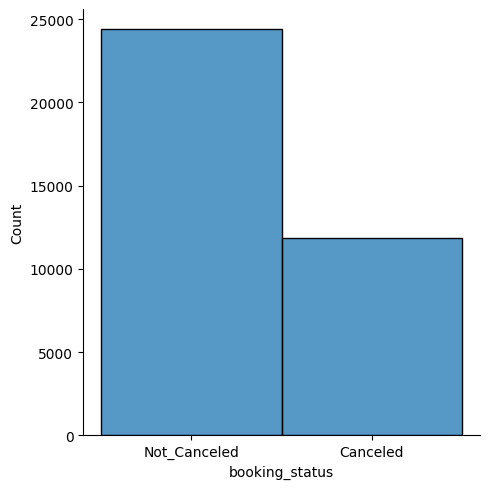

In [27]:
sns.displot(data["booking_status"])
plt.show()

booking status is skewed

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_val=train_test_split(data,test_size=0.2,stratify=data["booking_status"])

In [17]:
x_train["no_of_adults"].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

Number of adults=0 makes no sense

In [21]:
x_train["no_of_children"].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [22]:
x_train["no_of_weekend_nights"].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [23]:
x_train["no_of_week_nights"].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [26]:
x_train[x_train["no_of_week_nights"]==16]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
19745,1,0,6,16,Meal Plan 1,0,Room_Type 4,31,2018,3,3,Online,0,0,0,98.93,1,Canceled
34092,2,0,6,16,Not Selected,0,Room_Type 1,14,2018,2,3,Online,0,0,0,64.05,0,Canceled


In [29]:
x_train["type_of_meal_plan"].value_counts()

Meal Plan 1     22259
Not Selected     4111
Meal Plan 2      2646
Meal Plan 3         4
Name: type_of_meal_plan, dtype: int64

In [30]:
x_train["required_car_parking_space"].value_counts()

0    28115
1      905
Name: required_car_parking_space, dtype: int64

In [31]:
x_train["room_type_reserved"].value_counts()

Room_Type 1    22572
Room_Type 4     4801
Room_Type 6      747
Room_Type 2      564
Room_Type 5      211
Room_Type 7      119
Room_Type 3        6
Name: room_type_reserved, dtype: int64

In [34]:
x_train["lead_time"].value_counts()

0      1025
1       857
2       518
3       513
4       493
       ... 
293       1
381       1
351       1
325       1
319       1
Name: lead_time, Length: 347, dtype: int64

Too many values are there, so hist

In [35]:
x_train["arrival_year"].value_counts()

2018    23822
2017     5198
Name: arrival_year, dtype: int64

In [36]:
x_train["arrival_month"].value_counts()

10    4263
9     3724
8     3051
6     2517
12    2379
11    2373
7     2372
4     2220
5     2084
3     1856
2     1347
1      834
Name: arrival_month, dtype: int64

In [37]:
x_train["arrival_date"].value_counts()

2     1075
13    1070
4     1066
17    1056
16    1056
19    1054
20    1021
14    1015
15    1007
6      998
18     991
30     977
12     971
29     962
8      937
21     935
26     925
5      914
9      913
25     905
28     901
3      898
1      895
7      894
10     891
11     880
24     875
27     850
22     816
23     793
31     479
Name: arrival_date, dtype: int64

hist because of many values

In [38]:
x_train["market_segment_type"].value_counts()

Online           18577
Offline           8410
Corporate         1616
Complementary      309
Aviation           108
Name: market_segment_type, dtype: int64

In [39]:
x_train["repeated_guest"].value_counts()

0    28278
1      742
Name: repeated_guest, dtype: int64

In [40]:
x_train["no_of_previous_cancellations"].value_counts()

0     28753
1       160
2        35
3        28
11       22
5         9
4         8
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [41]:
x_train["no_of_previous_bookings_not_canceled"].value_counts()

0     28372
1       178
2        89
3        70
4        57
5        48
6        28
8        21
7        16
10       15
9        15
11       12
14        7
12        7
20        6
19        6
17        6
16        6
15        6
22        5
13        5
21        4
25        3
23        3
24        3
27        2
44        2
28        2
48        2
46        1
34        1
51        1
50        1
41        1
37        1
52        1
47        1
33        1
18        1
31        1
29        1
39        1
54        1
56        1
30        1
58        1
53        1
36        1
43        1
45        1
32        1
49        1
40        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

hist

In [42]:
x_train["avg_price_per_room"].value_counts()

65.00     683
75.00     660
90.00     570
115.00    536
95.00     527
         ... 
84.39       1
176.30      1
152.98      1
140.05      1
140.67      1
Name: avg_price_per_room, Length: 3488, dtype: int64

hist

In [43]:
x_train["no_of_special_requests"].value_counts()

0    15839
1     9065
2     3508
3      538
4       64
5        6
Name: no_of_special_requests, dtype: int64

In [44]:
x_train["booking_status"].value_counts()

Not_Canceled    19512
Canceled         9508
Name: booking_status, dtype: int64

In [45]:
x_train["booking_status"].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64